In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root = "/.data", train = True, download = True, transform = transform)

test_data = datasets.MNIST(root = "/.data", train = False, download = True, transform = transform)

batch_size = 64

train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = False)


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
    
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1,16, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(16),
            nn.ReLU(),

            nn.Conv2d(16,32, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.MaxPool2d(2))
        

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(32*14*14, 128),
            nn.ReLU(),
            nn.Linear(128,10))
        

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x
    
model = CNN()
print(model)



CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=6272, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [6]:
epochs  = 3
train_loss = []

for epoch in range(epochs):
    model.train()
    total_losses = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()



        total_losses += loss.item()


    avg_loss = total_losses / len(train_loader)
    train_loss.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
    



Epoch 1/3, Loss: 0.1475
Epoch 2/3, Loss: 0.0615
Epoch 3/3, Loss: 0.0452


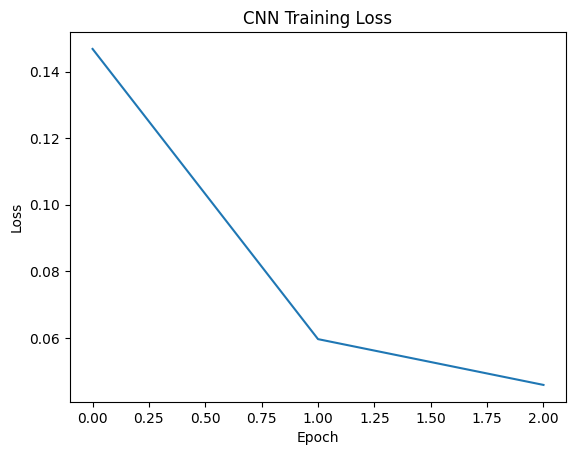

In [17]:
plt.plot(train_loss)
plt.title("CNN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [7]:
def calculate_accuracy(model,loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            prediction = torch.argmax(outputs, dim = 1)
            correct += (prediction == labels).sum().item()
            total += labels.size(0)

    return correct / total

acc = calculate_accuracy(model,test_loader)
print("CNN Test Accuracy", acc)


CNN Test Accuracy 0.99
